## Simple linear Regression problem

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [51]:
## Read the data from csv file
df=pd.read_csv('height-weight.csv')

In [52]:
df.head()

Weight  Height
0      45     120
1      58     135
2      48     123
3      60     145
4      70     160

In [53]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

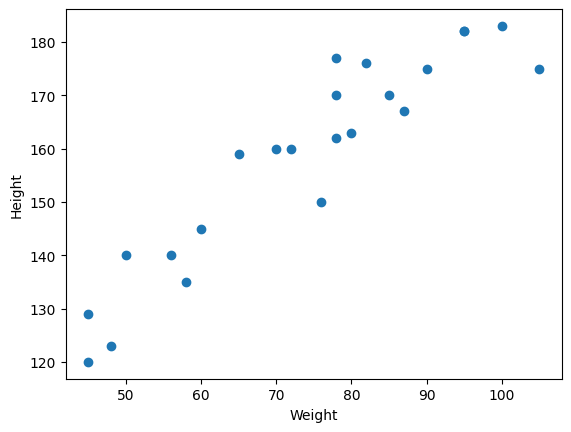

In [54]:
plt.scatter(df['Weight'],df['Height'])
plt.ylabel('Height')
plt.xlabel('Weight')
plt.show()

1. Divide the features into two groups: Independent and Dependent features.
2. Train test split of the dataset
3. Standardize the data

In [55]:
X=df[['Weight']]  #independent variable
y=df['Height']  #dependent variable

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [58]:
## Standardize train independent variable
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [59]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

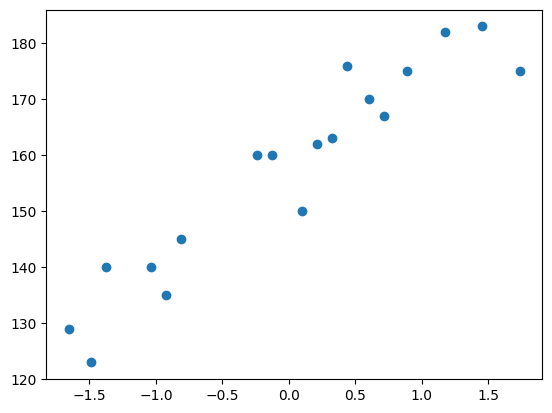

In [60]:
plt.scatter(X_train, y_train)

In [61]:
## Train the model (simple linear regression)
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [62]:
reg.fit(X_train,y_train)

LinearRegression()

In [63]:
slope =reg.coef_   ## slope of the line
print("The coefficient of weight is",slope)
intercept= reg.intercept_
print("The intercept is",intercept)

The coefficient of weight is [17.03440872]
The intercept is 157.5


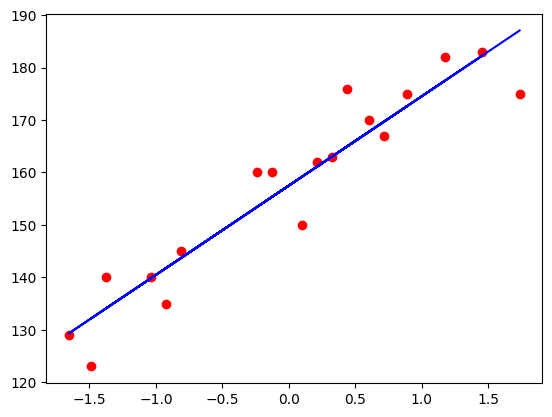

In [64]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,reg.predict(X_train),color='blue')

In [65]:
Y_pred_test=reg.predict(X_test)

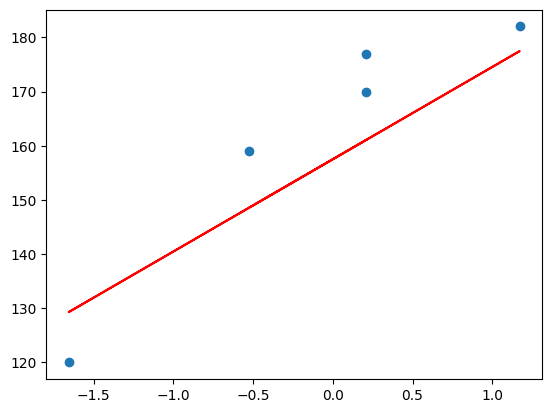

In [67]:
plt.scatter(X_test,y_test)
plt.plot(X_test,reg.predict(X_test), color='red')

In [73]:
## Performace matices of the model
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


In [74]:
mse=mean_squared_error(y_test,Y_pred_test)
print('mse=',mse)
mae=mean_absolute_error(y_test,Y_pred_test)
print('mae=',mae)
rmse=np.sqrt(mse)
print('rmse=',rmse)
print('r2_score',r2_score(y_test,Y_pred_test))


mse= 109.77592599051664
mae= 9.822657814519232
rmse= 10.477400726827081
r2_score 0.776986986042344


In [76]:
##  new data point weight is 80
scaler_weight = scaler.transform([[80]])
print(scaler_weight)

[[0.32350772]]


e:\AI-ML\code\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [77]:
## give this value to the model to predict the output
reg.predict(scaler_weight)

array([163.01076266])